In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## **Exercise 1: Harris Corner Detection**
**Task:** Harris Corner Detection is a classic corner detection algorithm. Use the Harris Corner Detection
algorithm to detect corners in an image.
* Load an image of your choice.

In [4]:
IMAGE1_PATH = os.path.join('..', 'assets', 'inputs', 'image1.jpg')
image = cv2.imread(IMAGE1_PATH)

* Convert it to grayscale.

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

* Apply the Harris Corner Detection method to detect corners.

In [6]:
gray_image = np.float32(gray_image)
dst = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)

* Visualize the corners on the image and display the result.

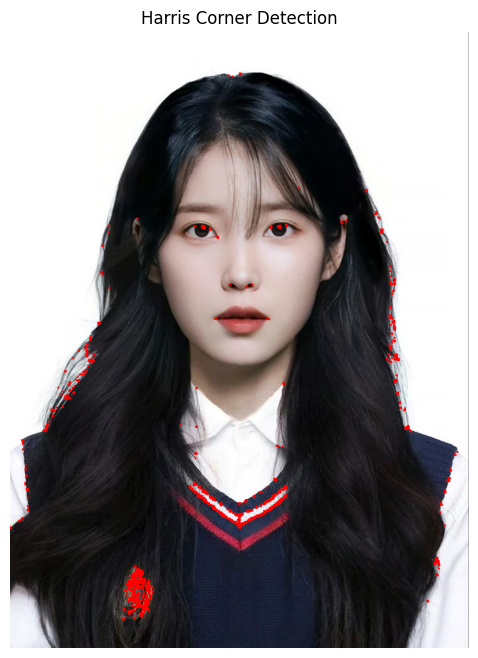

In [7]:
dst = cv2.dilate(dst, None)
image[dst > 0.01 * dst.max()] = [0, 0, 255]
  
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

### Conclusion
Harris Corner Detection Algorithm is one of the most used algorithms in computer vision to find key points that are corners of an image. Corners can be argued to be points that have significant changes in intensity levels in several directions. This makes them so central during feature extraction in tasks such as object recognition, image matching, and 3D reconstruction. Such a detector works by computing the gradient of pixel intensities over a neighborhood and evaluating a response function to determine the "cornerness" of each point.

The strength of the method lies in its efficiency and robustness with respect to noise, making it feasible for real-time applications. However, it suffers with a few drawbacks as it's sensitive to threshold values while determining significant corners, and it depends on scale. That is to say, in an image containing objects of varying sizes, the performance is not necessarily excellent in such cases. Nevertheless, Harris corners are mostly used as a set along with other methods, like SIFT or SURF, for obtaining more precise features concerning their matching and invariance to scales.

In summary, the Harris Corner Detection is a fundamental technique in the field of image processing and serves as a good basis for many higher-level computer vision tasks.

## **Exercise 2: HOG (Histogram of Oriented Gradients) Feature Extraction**
**Task:** The HOG descriptor is widely used for object detection, especially in human detection.

* Load an image of a person or any object.
* Convert the image to grayscale.
* Apply the HOG descriptor to extract features.
* Visualize the gradient orientations on the image.
Key Points:
* HOG focuses on the structure of objects through gradients.
* Useful for human detection and general object rec

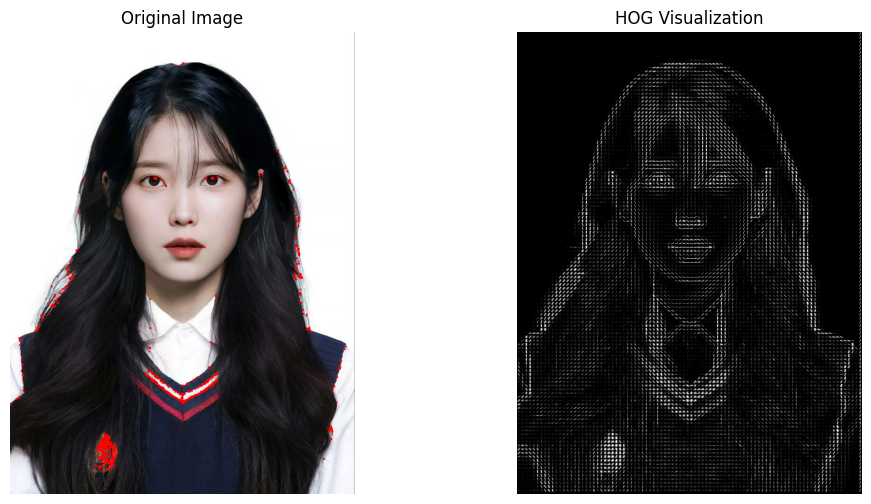

In [8]:
from skimage.feature import hog
from skimage import exposure
  
hog_features, hog_image = hog(
    gray_image,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2-Hys',
    visualize=True,
    feature_vector=True
)
  
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
  
plt.figure(figsize=(12, 6))
  
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
  
plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('HOG Visualization')
plt.axis('off')
  
plt.show()

### Conclusion
Histogram of Oriented Gradients is the most applicable feature extraction technique in many object detection and classification applications used in computer vision. It actually computes the orientation and magnitude of gradients within sections of images, where it captures patterns in edge orientation and intensity. These are then accumulated in histograms to describe the structure and the appearance of objects in an image.

This makes HOG very sensitive to the presence of objects like pedestrians since most objects exhibit large edge and gradient magnitudes. Another strength of HOG features is that it can appear invariant to illumination and small geometric transformations. However, it is prone to orientation, which may act as a weakness in certain applications where objects appear in varying orientations. With all these disadvantages, HOG is still a very popular approach in practice just because it is simple and efficient and behaves well on many detection tasks while being a base for more sophisticated approaches.

## **Exercise 3: FAST (Features from Accelerated Segment Test) Keypoint Detection**
**Task:** FAST is another keypoint detector known for its speed.
* Load an image.
* Convert the image to grayscale.
* Apply the FAST algorithm to detect keypoints.
* Visualize the keypoints on the image and display the result.
Key Points:
* FAST is designed to be computationally efficient and quick in detecting keypoints.
* It is often used in real-time applications like robotics and mobile vision.

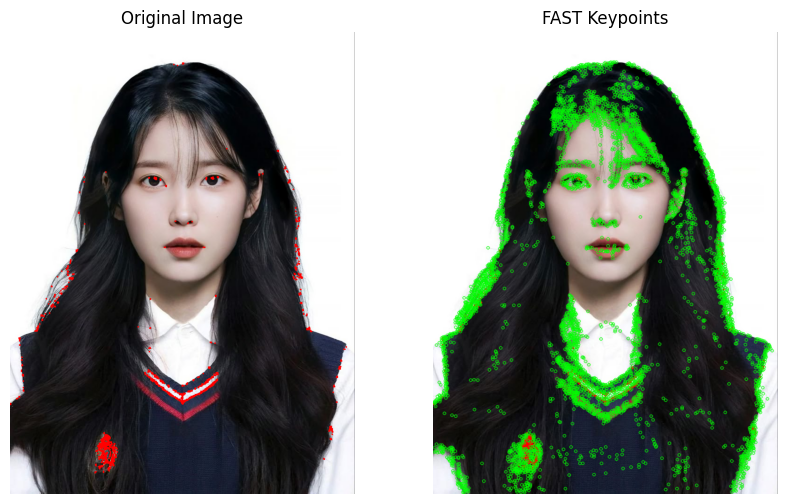

In [9]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create()

keypoints = fast.detect(gray_image, None)

image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('FAST Keypoints')
plt.axis('off')


plt.show()

### Conclusion
It is also known as Features from Accelerated Segment Test, designed to be fast and effective at detecting interest points in an image. Instead of checking the pixels' neighbors against a comparison of one pixel, an algorithm like FAST checks the interest point by examining several pixels within a circular area; it is looking at whether or not the point could be considered a corner based on the differences in intensity with the surrounding pixels. It is fast and computationally very efficient in its performance, making it also ideally suited to real-time applications, especially in environments where processing power is limited, such as on mobile devices or embedded systems.

FAST is incredibly fast compared to some of the other keypoint detectors, such as Harris or SIFT. However, it is not without limitations. It does not have built-in scale invariance; in some cases, the keypoints detected may not be very stable across different scales or rotations. However, with methods such as FAST with BRIEF or ORB, these disadvantages can be overcome in large extent. In total, FAST provides a strong basis for when the emphasis is on speed, where there are tight computational resources or when strict real-time performance becomes a critical factor.

## **Exercise 4: Feature Matching using ORB and FLANN**
**Task:** Use ORB descriptors to find and match features between two images using FLANN-based matching.

* Load two images of your choice.
* Extract keypoints and descriptors using ORB.
* Match features between the two images using the FLANN matcher.
* Display the matched features.

**Key Points:**
* ORB is fast and efficient, making it suitable for resource-constrained environments.
* FLANN (Fast Library for Approximate Nearest Neighbors) speeds up the matching process, making
it ideal for large datasets

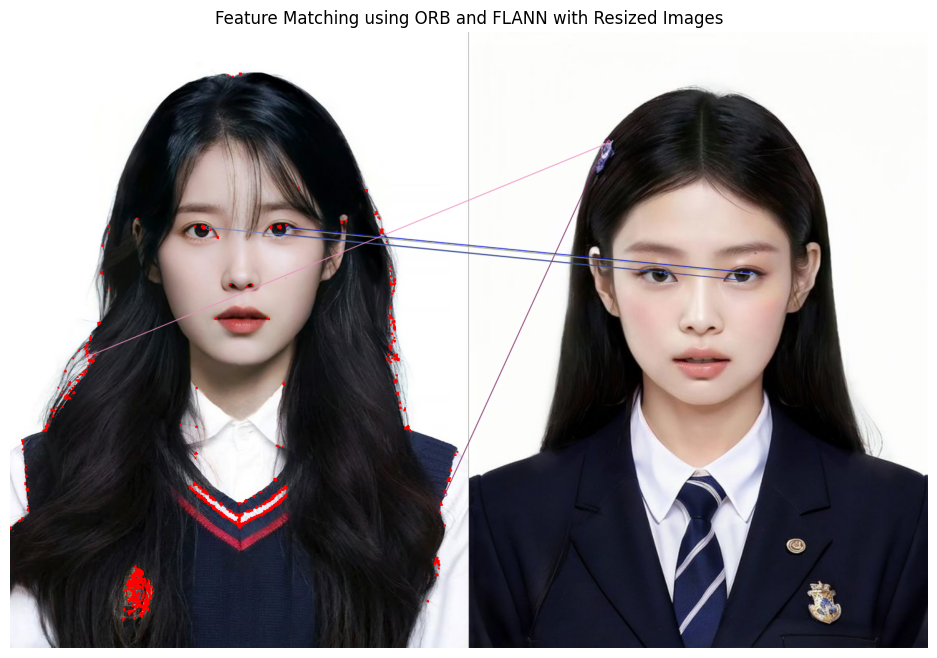

In [10]:
IMAGE2_PATH = os.path.join('..', 'assets', 'inputs', 'image2.jpg')
image2 = cv2.imread(IMAGE2_PATH)

height, width = image.shape[:2]
image2 = cv2.resize(image2, (width, height))

gray_image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create()

keypoints1, descriptors1 = orb.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray_image2, None)

index_params = dict(algorithm=6,
                    table_number=6,
                    key_size=12,
                    multi_probe_level=1)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(descriptors1, descriptors2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

matched_image = cv2.drawMatches(image, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 8))
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title('Feature Matching using ORB and FLANN with Resized Images')
plt.axis('off')
plt.show()

### Conclusion
Feature matching using ORB and FLANN is one of the most efficient ways to find corresponding points between two images. ORB is a computationally efficient feature detector and descriptor since it combines the speed of FAST in the detection of key points with the feature of BRIEF regarding invariance. It also brings in orientation and scale invariance, so applications such as object recognition and image stitching are well supported by this index due to robust properties of objects, which can appear to be rotated or scaled.

FLANN, on the other hand, provides an approximate fast method for finding matching features by using optimized algorithms for nearest neighbour search. This would allow a quicker and reliable extraction of features using ORB and FLANN at as few resources as possible, similar to the calculations in mobile or embedded systems. This is quite less accurate than SIFT and SURF but much faster and better performing; this makes it the best choice in applications where speed matters, such as processing large datasets or high computation time. This makes ORB with FLANN a realistic solution for many vision tasks where both speed and precision are important.

## **Exercise 5: Image Segmentation using Watershed Algorithm**
**Task:** The Watershed algorithm segments an image into distinct regions.
* Load an image.
* Apply a threshold to convert the image to binary.
* Apply the Watershed algorithm to segment the image into regions.
* Visualize and display the segmented regions.

**Key Points:**
* Image segmentation is crucial for object detection and recognition.
* The Watershed algorithm is especially useful for separating overlapping objects.
These exercises extend the concepts covered in the document, introducing a mix of foundational and real-
time applications. Let me know if you'd like more details on any specific task!

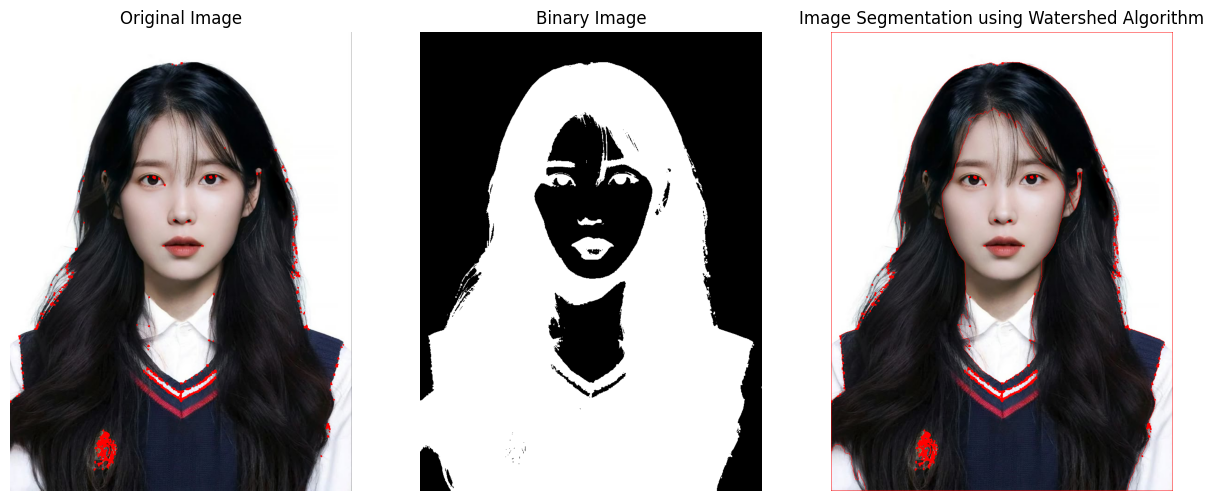

In [11]:
original = image.copy()

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_bg = cv2.dilate(opening, kernel, iterations=3)

sure_fg = np.uint8(sure_fg)
unknown_region = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown_region == 255] = 0

markers = cv2.watershed(image, markers)
image[markers == -1] = [0, 0, 255]  

plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image Segmentation using Watershed Algorithm')
plt.axis('off')

plt.show()

### Conclusion

The Watershed algorithm is a very strong technique for image segmentation of distinct regions or objects in an image where the boundaries may not be well defined. In this, the methodology considers the approach of the image as a topographic surface where intensities of pixels are regarded as their elevation; hence, segmentation is thus obtained by "flooding" the surface from markers placed in regions of interest. Where floods from two different markers meet, watershed lines or boundaries are created, thus dividing the image into several distinct segments. Further continuation of the algorithm results in the final outcome.

One of the advantages that the Watershed algorithm has over other algorithms is that it can easily give accurate segmentation on images where the objects overlap or touch each other, which many simple methods are not able to handle. However, the algorithm is noisy sensitive and overly sensitive that sometimes gives over-segmentation if the definition of the initial marker or gradients used is not defined well. Noise filtration or using markers from another method such as distance transforms or edge detection are typically applied before running the algorithm to prevent this. At the overall level, it can be seen that the Watershed algorithm stands as a powerful tool for the accurate segmentation of images, especially when all the techniques are used together to deal with complex images.
